In [3]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Bernardos/Desktop/dataset/tweets.csv",encoding='ISO-8859-1')
dataset.head()


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [34]:
#GENERATING WORD FREQUENCIES

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)

RT                                                                                                                                                                  11053
to                                                                                                                                                                   7650
is                                                                                                                                                                   5152
in                                                                                                                                                                   4491
the                                                                                                                                                                  4331
                                                                                                                                                      

(-0.5, 399.5, 329.5, -0.5)

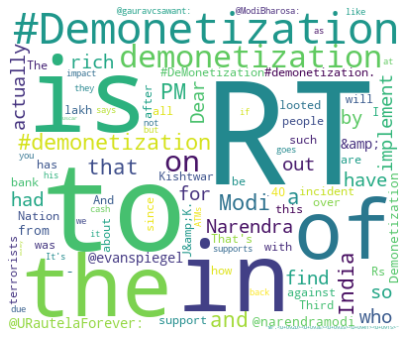

In [35]:
#EDA using word clouds
#import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#generate word frequencies
word_freq=gen_freq_word(dataset.text.str)

#generate word cloud
wc=WordCloud(width=400,height=330,max_words=100,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [36]:
#The above will solve problems related to RT, &amp and also the problem of counting same word twice due to case difference
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [37]:
#let's remove the above common words
#Stop words Removal
from wordcloud import STOPWORDS
print(STOPWORDS)


{'am', 'up', 'both', "i'm", 'like', 'a', 'the', "they've", 'what', "they'd", 'again', "doesn't", 'of', 'your', "don't", "he'd", 'to', "let's", 'doing', "she'll", "won't", 'until', "how's", "where's", 'there', "when's", 'you', 'at', 'during', "mustn't", 'off', 'theirs', 'ought', 'http', 'them', 'about', 'yours', 'shall', 'else', 'these', 'otherwise', 'herself', 'do', "he's", 'but', 'any', "that's", 'be', 'his', "haven't", 'nor', 'who', 'below', 'she', 'other', 'i', 'ourselves', "it's", 'him', "we're", 'himself', 'with', 'for', 'myself', "they'll", "you've", 'before', 'can', 'our', "we'd", 'only', 'com', 'however', 'from', 'themselves', 'so', "i'd", 'we', 'that', "can't", "wasn't", 'did', 'once', 'few', 'he', "aren't", 'or', 'me', 'therefore', 'where', "we've", 'further', 'more', 'above', "i'll", 'have', 'some', 'into', 'between', 'are', 'most', 'been', 'was', 'k', 'could', 'is', "shan't", 'very', 'through', 'would', 'an', 'as', 'and', 'cannot', 'should', "weren't", "she's", 'because', '

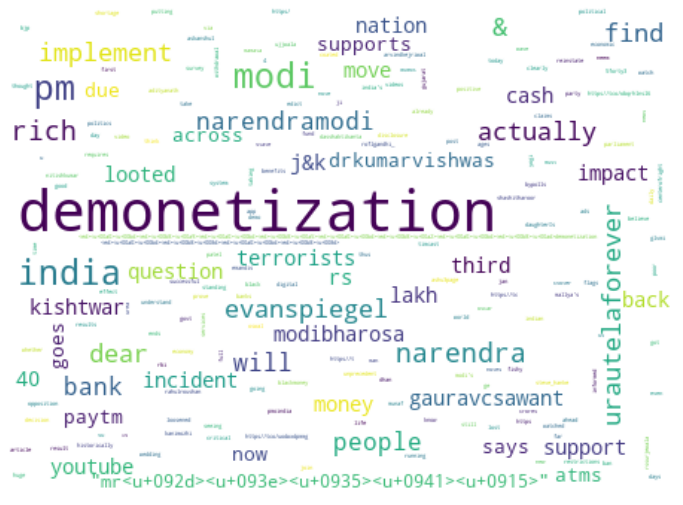

In [38]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bernardos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
#implementing text preprocessing using NLTK package
from nltk.tokenize import sent_tokenize,word_tokenize
text="hi john! ho are you doing? i will be in your city next week end."
word_tokenize(text)

['hi',
 'john',
 '!',
 'ho',
 'are',
 'you',
 'doing',
 '?',
 'i',
 'will',
 'be',
 'in',
 'your',
 'city',
 'next',
 'week',
 'end',
 '.']

In [47]:
#stemming
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
print(stemmer.stem("playing"))
print(stemmer.stem("played"))
print(stemmer.stem("increases"))

play
play
increas


In [59]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bernardos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bernardos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [55]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()
print(lemm.lemmatize("running"))
print(lemm.lemmatize("running",pos='v'))

running
run


In [60]:
from nltk import pos_tag
text="hi john! ho are you doing? i will be in your city next week end."
tokens=word_tokenize(text)
pos_tag(tokens)

[('hi', 'NN'),
 ('john', 'NN'),
 ('!', '.'),
 ('ho', 'NN'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG'),
 ('?', '.'),
 ('i', 'NN'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('in', 'IN'),
 ('your', 'PRP$'),
 ('city', 'NN'),
 ('next', 'IN'),
 ('week', 'NN'),
 ('end', 'NN'),
 ('.', '.')]

In [63]:
from nltk.corpus import wordnet
wordnet.synsets("computer")

[Synset('computer.n.01'), Synset('calculator.n.01')]

In [67]:
from nltk import ngrams
from nltk.tokenize import word_tokenize,sent_tokenize
sentence=" i love playing football every weekend"
n=2
for gram in ngrams(word_tokenize(sentence),n):
    print(gram)

('i', 'love')
('love', 'playing')
('playing', 'football')
('football', 'every')
('every', 'weekend')


In [68]:
#build a basic model for text classification
dataset=pd.read_csv("C:/Users/Bernardos/Desktop/dataset/final_dataset_basicmlmodel.csv",encoding='ISO-8859-1')
dataset.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [73]:
#Let's have a close look at some of the tweets
for index,tweet in enumerate(dataset['tweet'][:15]):
    print(index+1,".",tweet)

1 .  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2 . @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3 .   bihday your majesty
4 . #model   i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦  
5 .  factsguide: society now    #motivation
6 . [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
7 .  @user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦
8 . the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl
9 . we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  Ã¢ÂÂ¦ 
10 .  @user @user welcome here !  i'm   it's so #gr8 ! 
11 .  Ã¢ÂÂ #ireland consumer price index (mom) climbed from p

In [74]:
#- Noise present in Tweets
#Data Cleaning
import re

def text_clean(text):
    #Filter to allow only alphabets
    re.sub(r'[^a-zA-Z\']',' ',text)
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    #lowercase
    text=text.lower()
    return(text)
    

In [75]:
dataset['clean_text']=dataset.tweet.apply(lambda x: text_clean(x))

In [101]:
dataset.tweet.str.split()

0       [@user, when, a, father, is, dysfunctional, an...
1       [@user, @user, thanks, for, #lyft, credit, i, ...
2                                 [bihday, your, majesty]
3       [#model, i, love, u, take, with, u, all, the, ...
4                [factsguide:, society, now, #motivation]
                              ...                        
5237    [lady, banned, from, kentucky, mall., @user, #...
5238    [@user, omfg, i'm, offended!, i'm, a, mailbox,...
5239    [@user, @user, you, don't, have, the, balls, t...
5240    [makes, you, ask, yourself,, who, am, i?, then...
5241    [@user, #sikh, #temple, vandalised, in, in, #c...
Name: tweet, Length: 5242, dtype: object

In [78]:
#Feature Engineering
#Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.
#The machine learning model does not understand text directly, so we create numerical features that reperesant the underlying text.
#In this module, you'll deal with very basic NLP based features and as you progress further in the course you'll come across more complex and efficient ways of doing the same.
#Exhaustive list of stopwords in the english language. We want to focus less on these so at some point will have to filter


In [91]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
#Generate word frequency
def gen_freq(text):
    #store words
    word_list=[]
    for t in text.split():
        word_list.extend(t)
    #frequence of words
    freq_word= pd.Series(word_list).value_counts()
    #Drop the stopwords during the frequency calculation
    freq_word=freq_word.drop(STOP_WORDS, errors='ignore')
    return(freq_word)
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n','no','not','non'] or re.search(r"\wn't",word):
            return 1
        else:
            return 0
#Check whether one of the 100 rare words is present in the text
def any_rare(words,rare_100):
    for w in words:
        if w in rare_100:
            return 1
        else:
            return 0
#Check whether prompt words are present
def is_question(words):
    for q in words:
        if q in ['who','which','where','who','how','why','what','when']:
            return 1
        else :
            return 0
        
        


In [106]:
#
word_freq=gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100=word_freq[-100:]
#Number of words in a tweet
dataset['word_count']=dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg']=dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question']=dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare']=dataset.clean_text.str.split().apply(lambda x: any_rare(x,rare_100))
#Character count of the tweet
dataset['char_count']=dataset.clean_text.apply(lambda x : len(x))

In [107]:
dataset.head()

,id,label,tweet,clean_text,word_count,any_neg,is_question,any_rare,char_count
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,18,0,0,0,102
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,19,0,0,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,12,0,0,0,54
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,4,0,0,0,39


In [117]:
#Splitting the dataset into Train-Test split
from sklearn.model_selection import train_test_split

x=dataset[['word_count','any_neg','any_rare','char_count','is_question']]
y=dataset.label



In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=27)


,word_count,any_neg,any_rare,char_count,is_question
669,7,0,0,42,0
1084,12,0,0,99,0
2134,24,0,0,126,0
2439,16,0,0,95,1
3049,19,0,0,108,0


In [127]:
#Train an ML model for Text Classification
from sklearn.naive_bayes import GaussianNB
#Initialize GaussianNB classifier
model=GaussianNB()
#Fit the model on the train dataset
model=model.fit(x_train,y_train)
#Make predictions on the test dataset
pred=model.predict(x_test)


In [128]:
#Evaluate the ML mode
from sklearn.metrics import accuracy_score
print('accuracy=',accuracy_score(y_test,pred))

accuracy= 0.5961904761904762
